# Titanic Survival Prediction

### The task of developing a model that can forecast whether a passenger on board the Titanic ship would have survived the sinking or not, based on certain features or characteristics about the passengers, is known as "Titanic Survival Prediction." A well-known dataset frequently used to teach and practise machine learning and data analysis methods is the Titanic dataset. It includes details on Titanic passengers, such as whether or not they survived.

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  #plotting the graphs
%matplotlib inline
sns.set()  #setting seaborn default for plots

## 2. Loading the Data

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
print("Shape of df: ",df.shape)  #Total number of rows and columns

Shape of df:  (418, 12)


### We can see that there are 418 rows and 12 columns in our dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Data Dictionary

* Survived: 0 = No, 1 = Yes
* Pclass: Ticket Class: 1 = 1st, 2 = 2nd, 3 = 3rd
* Name: Name of passengers
* Sex: Sex of Passenger
* Age: Age of Passenger
* SibSp: Number of siblings / spouses aboard the Titanic
* Parch: Number of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Ticket Fare
* Cabin: Cabin number
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 3. Data Visualization

### Bar Chart for Categorical Features 

* Pclass
* Sex
* SibSp ( # of siblings and spouse)
* Parch ( # of parents and children)
* Embarked
* Cabin

### A. Survival based on Passenger Class (Pclass)

Text(0.5, 1.0, 'Bar graph of people according to ticket class in which people survived')

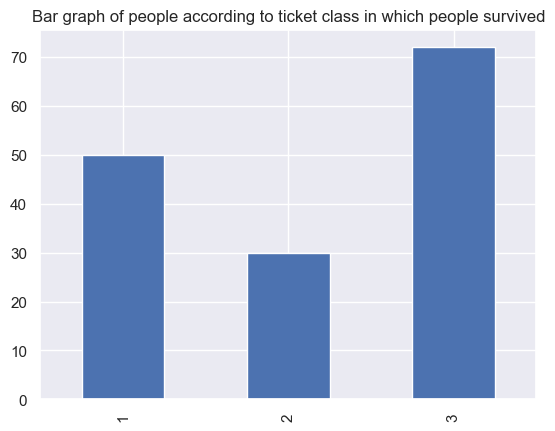

In [9]:
plt.figure(1)
df.loc[df['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people survived')

Text(0.5, 1.0, "Bar graph of people according to ticket class in which people couldn't survived")

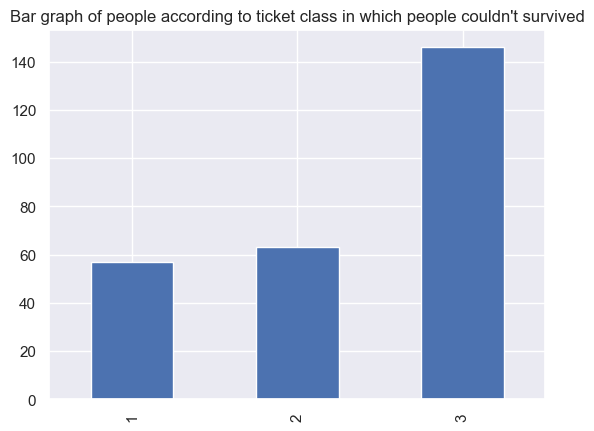

In [10]:
plt.figure(2)
df.loc[df['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people couldn\'t survived')

### B. Survival based on Age

([<matplotlib.axis.XTick at 0x208abb4ce80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

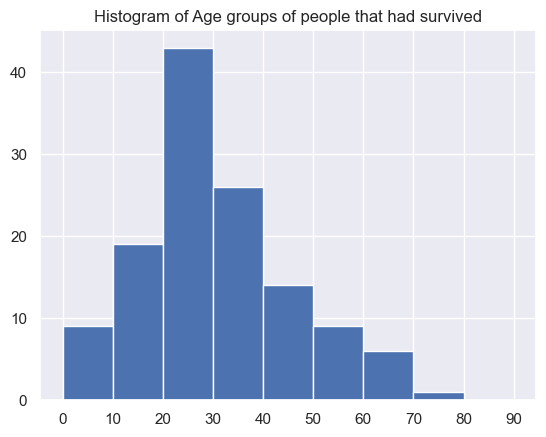

In [11]:
plt.figure(1)
age = df.loc[df.Survived == 1, 'Age']
plt.title('Histogram of Age groups of people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

([<matplotlib.axis.XTick at 0x208abbc4ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

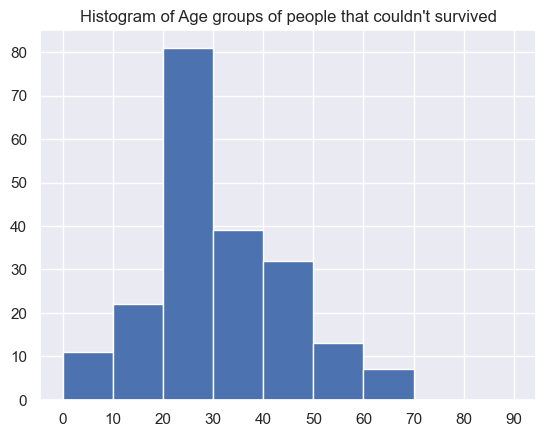

In [12]:
plt.figure(2)
age = df.loc[df.Survived == 0, 'Age']
plt.title('Histogram of Age groups of people that couldn\'t survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

### C. Survival based on Embarked Label

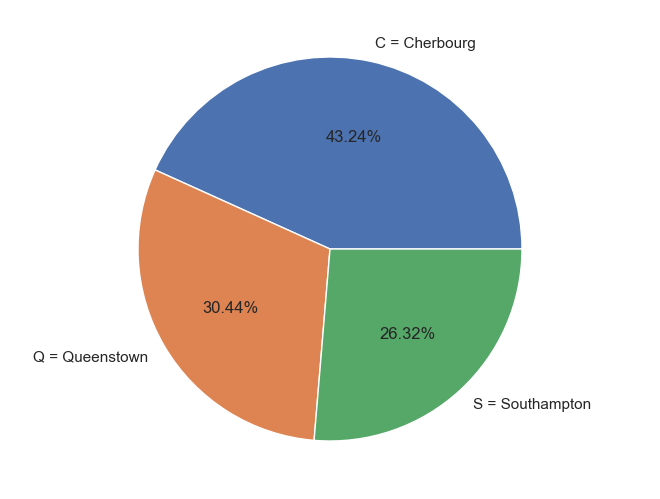

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.5535,0.3896,0.3369]
ax.pie(s, labels = l, autopct = '%1.2f%%')
plt.show()

### Here, we visualised three key terms—Age, Passenger Class, and Embarked — to examine how they affected the survival of the passengers. 

### Now We Could Even Find The Survival Rate Dependency Comparing With Individual Labels Without Plotting Them Like Above:-

### A. Considering Passenger Class (Pclass)

In [14]:
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


### B. Considering SibSp

In [15]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


### C. Considering the Embarked Label

In [16]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,Q,0.521739
0,C,0.392157
2,S,0.325926


## 4. Feature Selection

### Now we can see that the dataset provided approximately 12 different feature columns. Now, not all features affect the necessary target feature (in our case, survival). Therefore, it would be preferable to choose the most significant features and toss those that have a negligible effect on our target column. In machine learning, this procedure is known as feature selection.

### First, Let Us Drop Some Of The Less Important Features Of Our Datasets 

In [17]:
df = df.drop(['Ticket'], axis = 1)
df = df.drop(['Cabin'], axis = 1)
df = df.drop(['Name'], axis = 1)

In [18]:
#Feature Selection
column_df = ['Age','Pclass','SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

#training values
X = df[column_df]

#target values
Y = df['Survived']

### We discovered that some features had null values, while others contained categorical data that needed to be encoded in order to be used effectively during our data analysis phase.

### First, handle every null value by inserting a mean or median value into the null positions.

In [19]:
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

C:\Users\Paritosh Mathur\AppData\Local\Temp\ipykernel_12944\8070389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].median())


0

### Additionally, some features, such as - Sex and Embarked, are categorical in nature and could be used more effectively if they were encoded as integer values.

In [20]:
d = {'male':0, 'female':1}
X['Sex'] = X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

C:\Users\Paritosh Mathur\AppData\Local\Temp\ipykernel_12944\4092923079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].apply(lambda x:d[x])


0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

In [21]:
e = {'C':0, 'Q':1, 'S':2}
X['Embarked'] = X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

C:\Users\Paritosh Mathur\AppData\Local\Temp\ipykernel_12944\2622437285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].apply(lambda x:e[x])


0    1
1    2
2    1
3    2
4    2
Name: Embarked, dtype: int64